In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os

In [54]:
import pandas as pd
import os

def read_and_combine_data(data_pattern, data_type):
    """
    Reads and combines data from multiple files into a single DataFrame with a label column.

    Args:
        data_pattern (str): Type of data ('linearlySeparable', 'nonLinearlySeparable', or 'overlapping').
        data_type (str): Type of data ('train', 'test', or 'val').

    Returns:
        pd.DataFrame: Combined DataFrame with a 'Label' column.
    """
    dfs = []

    # Define the directory path based on data_pattern and data_type
    data_dir = os.path.join('data', data_pattern)
    i = 1
    for file_name in os.listdir(data_dir):
        file_dir = os.path.join(data_dir, file_name)
        
        if data_type in file_name:    
            label = f'Class {i}'
            i+=1
            if file_name.endswith('.txt'):
                df = pd.read_csv(file_dir, delim_whitespace=True, names=['X', 'Y'])
                df['Label'] = label
                dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

data_pattern = 'nonLinearlySeparable'  
data_type = 'val'  
combined_df = read_and_combine_data(data_pattern, data_type)
print(combined_df)


           X        Y    Label
0    2.15960  0.48926  Class 1
1    2.17740  0.19178  Class 1
2    2.59090 -0.18387  Class 1
3    1.51300  0.89757  Class 1
4    0.14546  0.82490  Class 1
..       ...      ...      ...
295 -0.31201 -1.38420  Class 2
296  1.33580 -0.36449  Class 2
297 -0.15131 -1.31570  Class 2
298 -1.29560 -0.59777  Class 2
299 -0.27580 -1.28520  Class 2

[300 rows x 3 columns]


In [67]:
def save_combined_data_to_csv(data_pattern, data_type, output_filename):
    """
    Reads and combines data, then saves the combined DataFrame to a CSV file.

    Args:
        data_pattern (str): Type of data ('linearlySeparable', 'nonLinearlySeparable', or 'overlapping').
        data_type (str): Type of data ('train', 'test', or 'val').
        output_filename (str): Name of the output CSV file.
    """
    combined_df = read_and_combine_data(data_pattern, data_type)
    output_filepath = os.path.join('combined_data', output_filename)
    combined_df.to_csv(output_filepath, index=False)
    print(f'Data saved to {output_filename}')
    
    return combined_df


In [68]:
linear_train_df = save_combined_data_to_csv('linearlySeparable', 'train', 'linear_train_data.csv')
linear_val_df = save_combined_data_to_csv('linearlySeparable', 'val', 'linear_val_data.csv')
linear_test_df = save_combined_data_to_csv('linearlySeparable', 'test', 'linear_test_data.csv')
non_linear_train_df = save_combined_data_to_csv('nonLinearlySeparable', 'train', 'non_linear_train_data.csv')
non_linear_val_df = save_combined_data_to_csv('nonLinearlySeparable', 'val', 'non_linear_val_data.csv')
non_linear_test_df = save_combined_data_to_csv('nonLinearlySeparable', 'test', 'non_linear_test_data.csv')
overlapping_train_df = save_combined_data_to_csv('overlapping', 'train', 'overlapping_train_data.csv')
overlapping_val_df = save_combined_data_to_csv('overlapping', 'val', 'overlapping_val_data.csv')
overlapping_test_df = save_combined_data_to_csv('overlapping', 'test', 'overlapping_test_data.csv')


Data saved to linear_train_data.csv
Data saved to linear_val_data.csv
Data saved to linear_test_data.csv
Data saved to non_linear_train_data.csv
Data saved to non_linear_val_data.csv
Data saved to non_linear_test_data.csv
Data saved to overlapping_train_data.csv
Data saved to overlapping_val_data.csv
Data saved to overlapping_test_data.csv


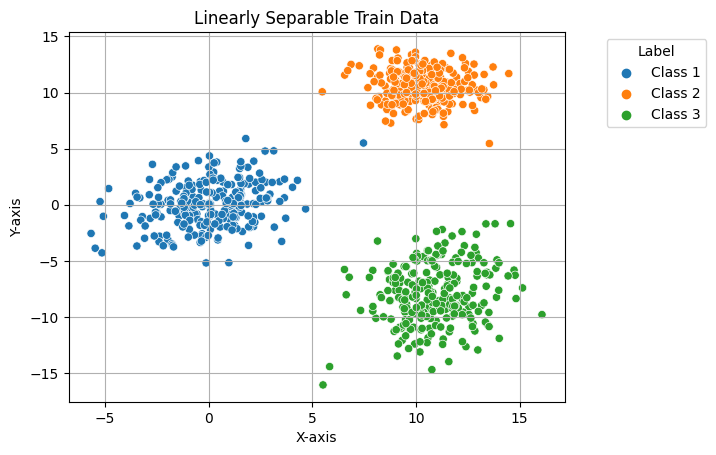

In [60]:
sns.scatterplot(data = linear_train_df, x = 'X', y = 'Y', hue='Label')
plt.title('Linearly Separable Train Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(title='Label', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

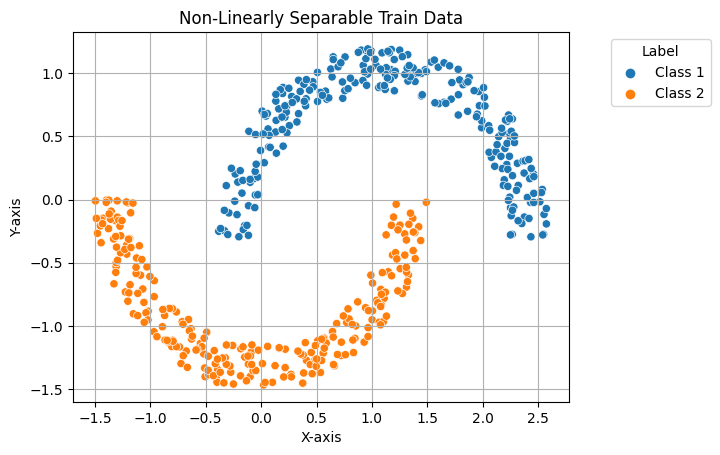

In [63]:
sns.scatterplot(data = non_linear_train_df, x = 'X', y = 'Y', hue='Label')
plt.title('Non-Linearly Separable Train Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(title='Label', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

In [31]:
train_df1 = pd.read_csv('data\overlapping\class1_train.txt', delim_whitespace=True, names=['X', 'Y'])
train_df2 = pd.read_csv('data\overlapping\class2_train.txt', delim_whitespace=True, names=['X', 'Y'])
train_df3 = pd.read_csv('data\overlapping\class3_train.txt', delim_whitespace=True, names=['X', 'Y'])

train_df1['Label'] = 'Class 1'
train_df2['Label'] = 'Class 2'
train_df3['Label'] = 'Class 3'

overlapping_train_df = pd.concat([train_df1, train_df2, train_df3], ignore_index=True)

overlapping_train_df

,X,Y,Label
0,3.665400,2.52750,Class 1
1,0.411300,1.30520,Class 1
2,1.558800,1.90240,Class 1
3,-0.018894,-2.73350,Class 1
4,-0.222490,2.16940,Class 1
...,...,...,...
745,3.548900,-0.22128,Class 3
746,3.859500,0.30439,Class 3
747,8.045600,-0.83831,Class 3
748,5.172800,-2.30040,Class 3


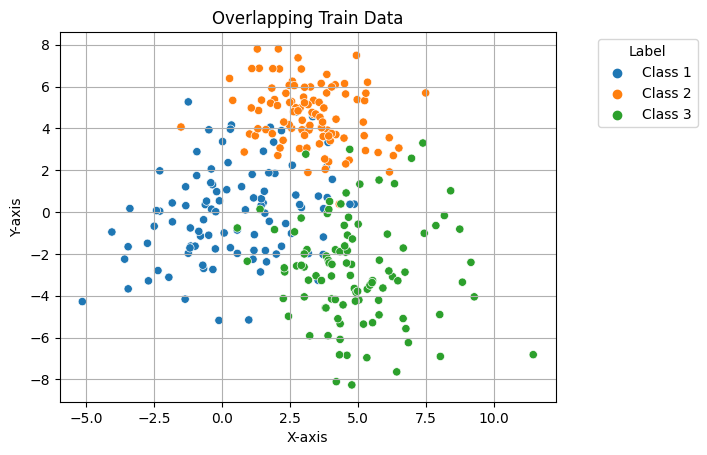

In [65]:
sns.scatterplot(data = overlapping_test_df, x = 'X', y = 'Y', hue='Label')
plt.title('Overlapping Train Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(title='Label', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

In [37]:
linear_train_df.to_csv('linear_train_data.csv', index=False)
non_linear_train_df.to_csv('non_linear_train_data.csv', index=False)
overlapping_train_df.to_csv('overlapping_train_data.csv', index=False)